# Glass Data Project :

The goal of this project is to use machine learning techniques on data of the composition of metals for different types of glass to predict the type of glass based on the metals it contains. 



In [1]:
# import the required packages 
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [35]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
                names = ['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type'])

In [5]:
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


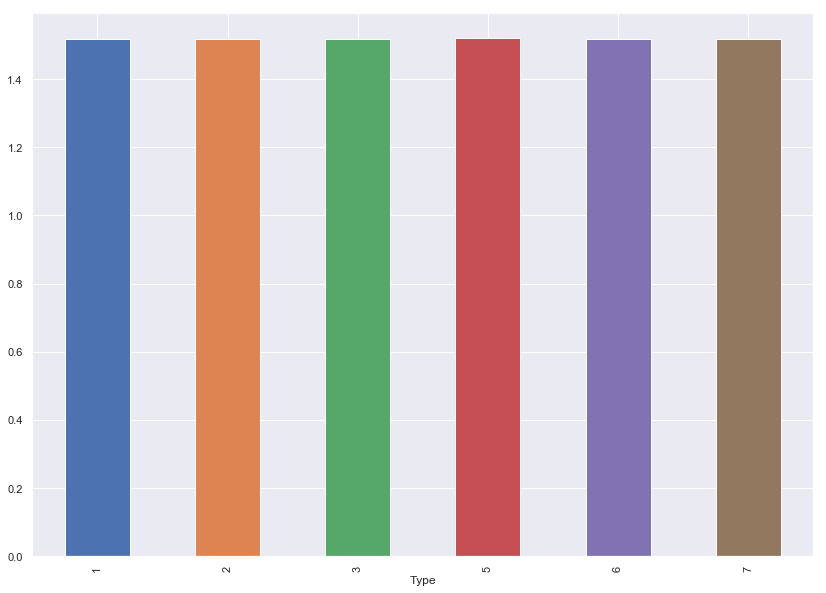

In [30]:
# refactive index for each type 
df.groupby('Type').mean()['RI'].plot.bar()

The Refractive Index is very similar for all the types of glass. 

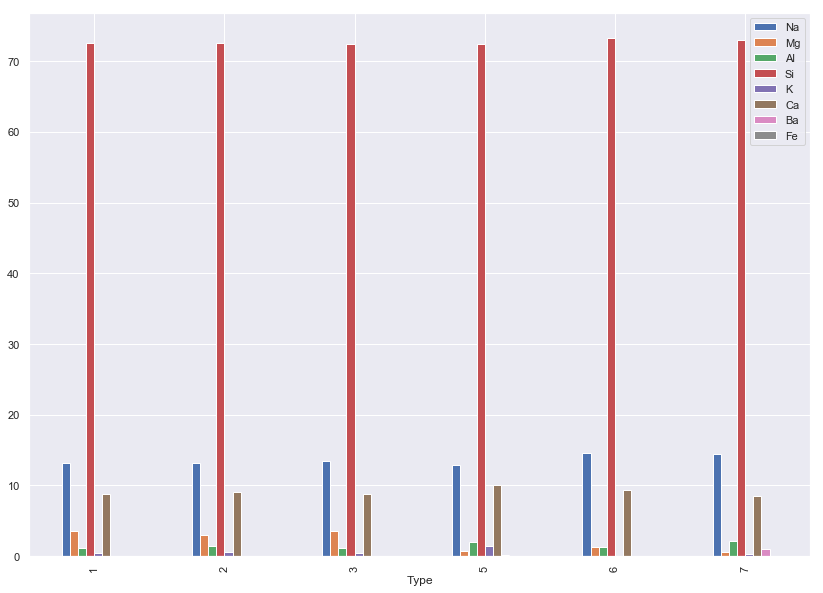

In [50]:
# types of metal in each type of glass 
df.iloc[:,2:11].groupby('Type').mean().plot.bar()

Some metals varry in the type of glass and some are the same. From the graphs its seems like the Silicon, Sodium, Calcium are very similiar in all types of glass.  Magnesium, Potasium and Aluminum seem to varry for each type of glass. Iron and Barium are only present in a few types of glass. 

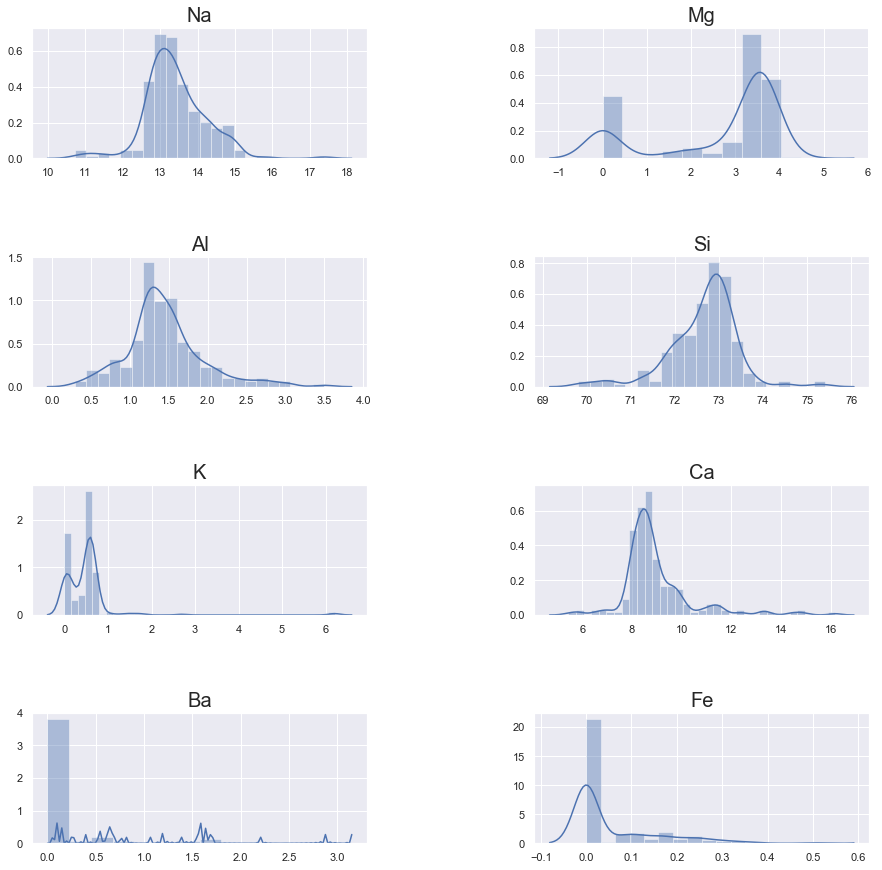

In [276]:
# histograms of each metal 
fig = plt.figure(figsize=(15.0, 15.0))
fig.subplots_adjust(hspace=0.75, wspace=0.5)

for x,i in enumerate(range(2,10)):
    index = x+1 
    ax = plt.subplot(4,2,(index))
    plt.title(df.columns[i], fontsize = 20)
    sns.distplot(df.iloc[:,i])
    ax.set_ylabel('') 
    ax.set_xlabel('')

plt.show()

As mentioned beofre, Ba and Fe have numerous 0 values. Mg seems to have some 0 values as well. The rest of the metals seem to be normally distributed.  

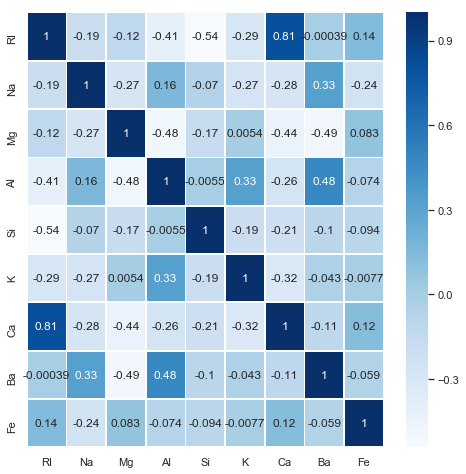

In [242]:
# correlation plot 

df_corr = df.iloc[:,1:10].corr()
df_corr

sns.set(rc={'figure.figsize':(8,8)})

sns.heatmap(df_corr,cmap="Blues",annot=True,linewidths=.75)

There is nothing that is strongly correlated except for calcium and the refraction index. The correlation plot shows that these two varriables are 81% positively correlated. 

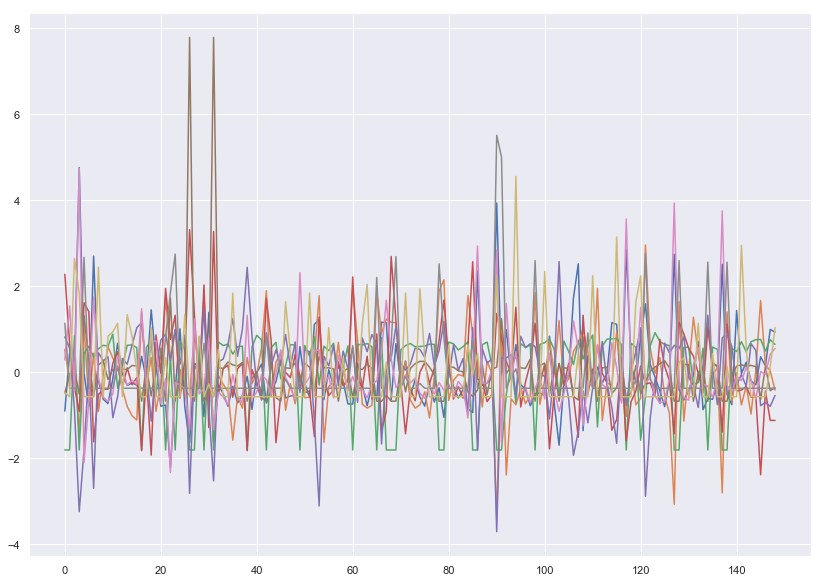

In [113]:
### Split-out validation dataset\
X = df.iloc[:,1:10]
Y = df.Type 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 43)

### Data Transforamtion 
# Standardize the data before modeling  

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
plt.plot(X_train_std)

Text(0.5, 0, 'K Value')

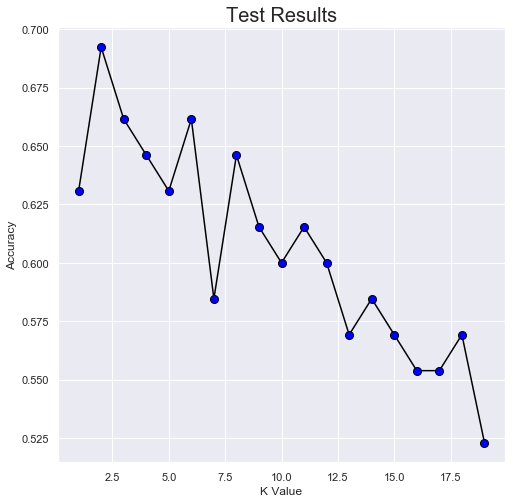

In [207]:
# Model using Standardized data and Minkowski 
y_value = []
x_value = []
for i in range(1,20) : 
        knn = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
        knn.fit(X_train_std, Y_train)
        y_pred = knn.predict(X_test_std)
        x_value.append(i)
        y_value.append(accuracy_score(Y_test, y_pred))


test_df = pd.DataFrame(
            {
             'K' : x_value,   
             'Accuracy' : y_value
            })

fig = plt.figure(figsize=(8, 8))
plt.title('Test Results', fontsize = 20)
plt.plot(test_df.K,test_df.Accuracy,
           marker='o', 
           markerfacecolor='blue', 
           markersize=8, 
           color = 'black')

plt.ylabel('Accuracy')
plt.xlabel('K Value')

In [250]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize

####Estimate #1 - Defualt 

# creating odd list of K for KNN
k_list= list(range(1,50))

# subsetting just the odd ones
neighbors = list(range(1,50,2))

# empty list that will hold cv scores
cv_scores_1 = []
k_values_1 = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_std, Y_train, cv=10, scoring='accuracy')
    cv_scores_1.append(scores.mean())
    k_values_1.append(k)
    
#####Estimate #2 - Minkowski

# empty list that will hold cv scores
cv_scores_2 = []
k_values_2 = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p = 5 )
    scores = cross_val_score(knn, X_train_std, Y_train, cv=10, scoring='accuracy')
    cv_scores_2.append(scores.mean())
    k_values_2.append(k)
    
#####Estimate #3 - Euclidean
# empty list that will hold cv scores
cv_scores_3 = []
k_values_3 = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    scores = cross_val_score(knn, X_train_std, Y_train, cv=10, scoring='accuracy')
    cv_scores_3.append(scores.mean())
    k_values_3.append(k)

#####Estimate #4 - Chebyshev
# empty list that will hold cv scores
cv_scores_4 = []
k_values_4 = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='chebyshev')
    scores = cross_val_score(knn, X_train_std, Y_train, cv=10, scoring='accuracy')
    cv_scores_4.append(scores.mean())
    k_values_4.append(k)

    
#####Estimate #5 -BrayCurtisDistance
# empty list that will hold cv scores
cv_scores_5 = []
k_values_5 = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='braycurtis')
    scores = cross_val_score(knn, X_train_std, Y_train, cv=10, scoring='accuracy')
    cv_scores_5.append(scores.mean())
    k_values_5.append(k)

####Estimate #6 - Using Normalization 
# empty list that will hold cv scores
cv_scores_6 = []
k_values_6 = []

#normalize data 
X_train_N = normalize(X_train_std)

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    scores = cross_val_score(knn, X_train_N, Y_train, cv=10, scoring='accuracy')
    cv_scores_6.append(scores.mean())
    k_values_6.append(k)

    

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The min

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The min

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The min

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The min

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The min

Estimate 1 : Optimal number of neighbors is 1 and accuracy is 0.69
Estimate 2 : Optimal number of neighbors is 1 and accuracy is 0.65
Estimate 3 : Optimal number of neighbors is 1 and accuracy is 0.69
Estimate 4 : Optimal number of neighbors is 1 and accuracy is 0.64
Estimate 5 : Optimal number of neighbors is 1 and accuracy is 0.71
Estimate 6 : Optimal number of neighbors is 1 and accuracy is 0.71


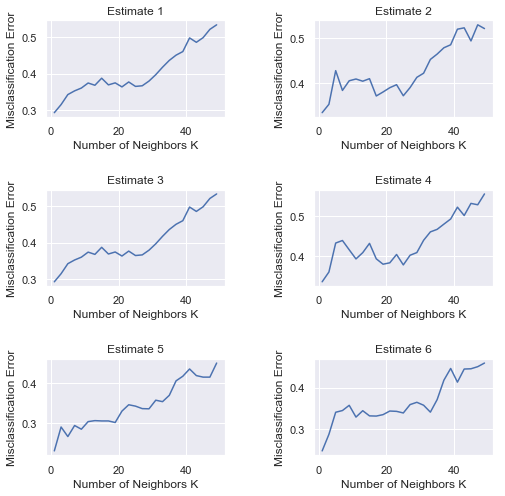

In [296]:
# Ploting Graphs 


# changing to misclassification error
MSE_1 = [1 - x for x in cv_scores_1]
MSE_2 = [1 - x for x in cv_scores_2]
MSE_3 = [1 - x for x in cv_scores_3]
MSE_4 = [1 - x for x in cv_scores_4]
MSE_5 = [1 - x for x in cv_scores_5]
MSE_6 = [1 - x for x in cv_scores_6]

# determining best k
optimal_k_1 = neighbors[MSE_1.index(min(MSE_1))]
E_1 = optimal_k_1 
optimal_k_2 = neighbors[MSE_2.index(min(MSE_2))]
E_2 = optimal_k_2 
optimal_k_3 = neighbors[MSE_3.index(min(MSE_3))]
E_3 = optimal_k_3 
optimal_k_4 = neighbors[MSE_4.index(min(MSE_4))]
E_4 = optimal_k_4 
optimal_k_5 = neighbors[MSE_5.index(min(MSE_5))]
E_5 = optimal_k_5
optimal_k_6 = neighbors[MSE_6.index(min(MSE_6))]
E_6 = optimal_k_6


print (f"Estimate 1 : Optimal number of neighbors is {E_1} and accuracy is {round(cv_scores_1[E_1],2)}")
print (f"Estimate 2 : Optimal number of neighbors is {E_2} and accuracy is {round(cv_scores_2[E_2],2)}")
print (f"Estimate 3 : Optimal number of neighbors is {E_3} and accuracy is {round(cv_scores_3[E_3],2)}")
print (f"Estimate 4 : Optimal number of neighbors is {E_4} and accuracy is {round(cv_scores_4[E_4],2)}")
print (f"Estimate 5 : Optimal number of neighbors is {E_5} and accuracy is {round(cv_scores_5[E_5],2)}")
print (f"Estimate 6 : Optimal number of neighbors is {E_6} and accuracy is {round(cv_scores_6[E_6],2)}")

# plot misclassification error vs k

fig = plt.figure()
fig.subplots_adjust(hspace=0.75, wspace=0.5)
    
plt.subplot(3,2,1)
plt.title('Estimate 1')
plt.plot(neighbors, MSE_1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

plt.subplot(3,2,2)
plt.title('Estimate 2')
plt.plot(neighbors, MSE_2)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

plt.subplot(3,2,3)
plt.title('Estimate 3')
plt.plot(neighbors, MSE_3)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')


plt.subplot(3,2,4)
plt.title('Estimate 4')
plt.plot(neighbors, MSE_4)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')


plt.subplot(3,2,5)
plt.title('Estimate 5')
plt.plot(neighbors, MSE_5)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')


plt.subplot(3,2,6)
plt.title('Estimate 6')
plt.plot(neighbors, MSE_6)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')


plt.show()


In [334]:
from sklearn.decomposition import PCA

# 95% of the varriance - 6 dimensons
pca1 = PCA(0.95)
X_train_pca1 = pca1.fit_transform(X_train_std)
X_train_pca1 = pd.DataFrame(X_train_pca1, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

X_test_pca1 = pca1.fit_transform(X_test_std)
X_test_pca1 = pd.DataFrame(X_test_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

X_train_pca1.head()


,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.917277,2.382935,-0.592752,-1.142289,-0.409471,-0.297551
1,0.563414,1.553202,-0.333029,-1.108300,-1.510318,-0.868875
2,0.631824,-0.893583,1.082486,-0.145588,2.453178,-0.700794
3,7.069799,3.092584,2.233964,-0.521814,-0.234236,-0.825798
4,-2.469196,1.520427,2.004531,2.021361,0.999558,1.748341


In [306]:
len(X_train_pca)

149

In [313]:
####Estimate #7 - PCA

# creating odd list of K for KNN
k_list= list(range(1,50))

# subsetting just the odd ones
neighbors = list(range(1,50,2))

# empty list that will hold cv scores
cv_scores_7 = []
k_values_7 = []

#normailze the data
X_train_N_pca = normalize(X_train_pca)

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    scores = cross_val_score(knn, X_train_N_pca, Y_train, cv=10, scoring='accuracy')
    cv_scores_7.append(scores.mean())
    k_values_7.append(k)




C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The min

Estimate 7 : Optimal number of neighbors is 1 and accuracy is 0.71


Text(0, 0.5, 'Misclassification Error')

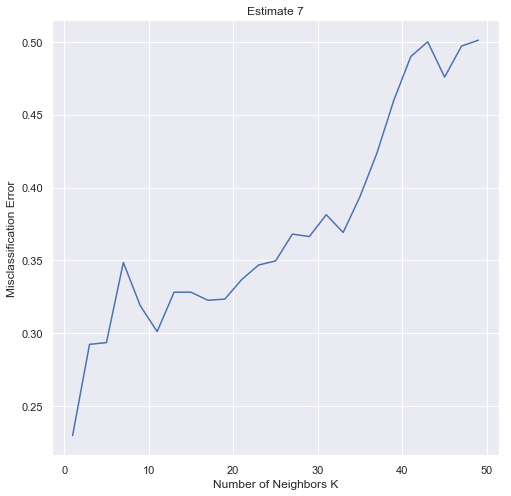

In [335]:
# changing to misclassification error

MSE_7 = [1 - x for x in cv_scores_7]

# determining best k
optimal_k_7 = neighbors[MSE_7.index(min(MSE_7))]
E_7 = optimal_k_7

print (f"Estimate 7 : Optimal number of neighbors is {E_7} and accuracy is {round(cv_scores_7[E_7],2)}")

# plot misclassification error vs k

fig = plt.figure()

    
plt.title('Estimate 7')
plt.plot(neighbors, MSE_7)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

The PCA chosen explains 95% of the varriance of the data from 6 dimensions. When the test is donw with the PCA, it produces the same results as the test with the all dimensions used. This shows that the number of dimensions can be lowered to 6 for faster processing while still maintaing accurate results. 

### Summary 

From the tests it can be seen that the optimal number of neighbours in the KNN learning would be 1 for this data set. 

Changing the method of the caluclation for the distance for the tests alters the accuracy observed but does not change the optimal K number. 

Normaluzing the data produces a more accurate result. 

Using PCA it was seen that 6 dimensions could explain 95% of the varriance and this produced the same result as the using all the dimensions. 

Overall the highest accuracy obserserved was 71%. This would not be sufficient to accurately estimate the glass tpye given a data set. 